In [1]:
%load_ext autoreload
%autoreload 2

In [11]:
import os
import glob
import sys  
sys.path.insert(0, r'C:\Users\Rodrigo\Desktop\PhD\Study1\Physiological_Data')

In [3]:
import warnings
from Signals_Processing import *
from Process import *
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn import ensemble, feature_selection
import pickle

In [4]:
os.chdir('C:\\Users\\Rodrigo\\Desktop\\PhD\\loop-system\\')
os.getcwd()

'C:\\Users\\Rodrigo\\Desktop\\PhD\\loop-system'

In [28]:
import re
numbers = re.compile(r'(\d+)')
files=[]
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

for infile in sorted(glob.glob('C:\\Users\\Rodrigo\\Desktop\\PhD\\loop-system\\Training Models\\P0\\Signals\\*.csv'), key=numericalSort):
    files.append(infile)

In [31]:
signals=[]
for fname in files:
    signals.append(pd.read_csv(fname,index_col=False))
signals

[        Timestamps      nSeq     ECG0    EDA1  RESPIRATION2
 0     71005.700389  174407.0 -0.09766  7.2292       0.42462
 1     71005.700402  174408.0 -0.09865  7.2319       0.42728
 2     71005.700408  174409.0 -0.09488  7.2395       0.42220
 3     71005.700410  174410.0 -0.09209  7.2357       0.43295
 4     71005.700411  174411.0 -0.07367  7.2495       0.42526
 ...            ...       ...      ...     ...           ...
 3995  71045.580263  178402.0  0.66055  6.9397       0.03003
 3996  71045.590239  178403.0 -0.01941  6.9687       0.02930
 3997  71045.600205  178404.0 -0.10117  6.9473       0.03113
 3998  71045.610159  178405.0 -0.10260  6.9519       0.03543
 3999  71045.620103  178406.0 -0.08490  6.9458       0.03534
 
 [4000 rows x 5 columns],
         Timestamps      nSeq     ECG0    EDA1  RESPIRATION2
 0     71005.924531  174437.0 -0.00036  7.2437       0.35184
 1     71005.938705  174438.0  0.00036  7.2418       0.34442
 2     71005.951397  174439.0  0.00521  7.2636       0.33

In [43]:
x=[]
for epoch in signals:
    x.append(epoch["Timestamps"][0])
    print(np.array(epoch["Timestamps"])[-1]-np.array(epoch["Timestamps"][0]))
    print(np.array(epoch["nSeq"])[-1]-np.array(epoch["nSeq"][0]))

39.91971414879663
3999.0
39.99538795277476
3999.0
39.973601441655774
3999.0
39.985560306420666
3999.0
39.989931807111134
3999.0
39.994168714867556
3999.0
39.995186312589794
3999.0
39.995186312589794
3999.0
39.986079829453956
3999.0
39.989419372344855
3999.0
39.987024905276485
3999.0
39.98785755230347
3999.0
39.98785755230347
3999.0
39.98839924859931
3999.0
39.98839924859931
3999.0
39.99031782915699
3999.0
39.9889134177065
3999.0
39.98568148336199
3999.0
39.98313123550906
3999.0
39.98313123550906
3999.0
39.98242823648616
3999.0
39.98313910896832
3999.0
39.985768446160364
3999.0
39.98496006295318
3999.0
39.985654133124626
3999.0
39.985372859067866
3999.0
39.98253108425706
3999.0
39.97970213598455
3999.0
39.978524997946806
3999.0
39.978524997946806
3999.0
39.97921229552594
3999.0
39.979652578927926
3999.0
39.98192191933049
3999.0
39.98255232567317
3999.0
39.982128342817305
3999.0


In [40]:
np.diff(np.array(x))

array([0.22414214, 0.34185752, 0.30754138, 0.31575057, 0.31565857,
       0.31899089, 0.        , 0.32902245, 0.31647032, 0.32217063,
       0.31945542, 0.        , 0.63985777, 0.        , 0.6382072 ,
       0.32134663, 0.32302795, 0.32223814, 0.        , 0.32042406,
       0.31924528, 0.31771412, 0.32093368, 0.31933643, 0.32000849,
       0.32263879, 0.32253231, 0.32118101, 0.        , 0.31968875,
       0.31964468, 0.31755402, 0.31906339, 0.32011368])

## Features

In [22]:
warnings.filterwarnings("ignore")
dataframe=pd.DataFrame()
for epoch in signals:
    HRV_Dataframe = Process_HRV(epoch["ECG0"], 100, 16)
    EDA_Dataframe = Process_EDA(epoch["EDA1"], 100, 16)
    RESP_Dataframe = Process_RESP(epoch["RESPIRATION2"], 100, 16)
    dataframe = dataframe.append((HRV_Dataframe.join(EDA_Dataframe)).join(RESP_Dataframe),ignore_index=True)

In [155]:
warnings.filterwarnings("ignore")
dataframe1=pd.DataFrame()
for epoch in signals1:
    HRV_Dataframe = Process_HRV(epoch["ECG0"], 100, 16)
    EDA_Dataframe = Process_EDA(epoch["EDA1"], 100, 16)
    RESP_Dataframe = Process_RESP(epoch["RESPIRATION2"], 100, 16)
    dataframe1 = dataframe.append((HRV_Dataframe.join(EDA_Dataframe)).join(RESP_Dataframe),ignore_index=True)

In [23]:
features = pd.read_csv(r'C:\Users\Rodrigo\Desktop\PhD\loop-system\Training Models\P0\pocess_features.csv',index_col=False)
features[features.columns[128:]]

Avg HR     Min HR     Max HR        SD    AVG RR  Minimum RR  \
0   71.570171  65.917582  84.485915  3.850307  0.840645    0.710178   
1   71.570171  65.917582  84.485915  3.850307  0.840645    0.710178   
2   71.570171  65.917582  84.485915  3.850307  0.840645    0.710178   
3   71.570171  65.917582  84.485915  3.850307  0.840645    0.710178   
4   71.570171  65.917582  84.485915  3.850307  0.840645    0.710178   
5   71.570171  65.917582  84.485915  3.850307  0.840645    0.710178   
6   71.570171  65.917582  84.485915  3.850307  0.840645    0.710178   
7   71.570171  65.917582  84.485915  3.850307  0.840645    0.710178   
8   71.570171  65.917582  84.485915  3.850307  0.840645    0.710178   
9   71.570171  65.917582  84.485915  3.850307  0.840645    0.710178   
10  71.570171  65.917582  84.485915  3.850307  0.840645    0.710178   
11  71.570171  65.917582  84.485915  3.850307  0.840645    0.710178   
12  71.570171  65.917582  84.485915  3.850307  0.840645    0.710178   
13  71.570171  65.917582  84.485915  3.850307  0.840645    0.710178   
14  71.570171  65.917582  84.485915  3.850307  0.840645    0.710178   
15  71.570171  65.917582  84.485915  3.850307  0.840645    0.710178   
16  71.570171  65.917582  84.485915  3.850307  0.840645    0.710178   
17  71.570171  65.917582  84.485915  3.850307  0.840645    0.710178   
18  71.570171  65.917582  84.485915  3.850307  0.840645    0.710178   
19  71.570171  65.917582  84.485915  3.850307  0.840645    0.710178   
20  71.570171  65.917582  84.485915  3.850307  0.840645    0.710178   
21  71.570171  65.917582  84.485915  3.850307  0.840645    0.710178   
22  71.570171  65.917582  84.485915  3.850307  0.840645    0.710178   
23  71.570171  65.917582  84.485915  3.850307  0.840645    0.710178   
24  71.570171  65.917582  84.485915  3.850307  0.840645    0.710178   
25  71.570171  65.917582  84.485915  3.850307  0.840645    0.710178   
26  71.570171  65.917582  84.485915  3.850307  0.840645    0.710178   
27  71.570171  65.917582  84.485915  3.850307  0.840645    0.710178   
28  71.570171  65.917582  84.485915  3.850307  0.840645    0.710178   
29  71.570171  65.917582  84.485915  3.850307  0.840645    0.710178   
30  71.570171  65.917582  84.485915  3.850307  0.840645    0.710178   
31  71.570171  65.917582  84.485915  3.850307  0.840645    0.710178   
32  71.570171  65.917582  84.485915  3.850307  0.840645    0.710178   
33  71.570171  65.917582  84.485915  3.850307  0.840645    0.710178   
34  71.570171  65.917582  84.485915  3.850307  0.840645    0.710178   
35  71.570171  65.917582  84.485915  3.850307  0.840645    0.710178   
36  71.570171  65.917582  84.485915  3.850307  0.840645    0.710178   
37  71.570171  65.917582  84.485915  3.850307  0.840645    0.710178   
38  71.570171  65.917582  84.485915  3.850307  0.840645    0.710178   
39  71.570171  65.917582  84.485915  3.850307  0.840645    0.710178   
40  71.570171  65.917582  84.485915  3.850307  0.840645    0.710178   
41  71.570171  65.917582  84.485915  3.850307  0.840645    0.710178   
42  71.570171  65.917582  84.485915  3.850307  0.840645    0.710178   
43  71.570171  65.917582  84.485915  3.850307  0.840645    0.710178   
44  71.570171  65.917582  84.485915  3.850307  0.840645    0.710178   
45  71.570171  65.917582  84.485915  3.850307  0.840645    0.710178   
46  71.570171  65.917582  84.485915  3.850307  0.840645    0.710178   
47  71.570171  65.917582  84.485915  3.850307  0.840645    0.710178   
48  71.570171  65.917582  84.485915  3.850307  0.840645    0.710178   
49  71.570171  65.917582  84.485915  3.850307  0.840645    0.710178   
50  71.570171  65.917582  84.485915  3.850307  0.840645    0.710178   
51  71.570171  65.917582  84.485915  3.850307  0.840645    0.710178   
52  71.570171  65.917582  84.485915  3.850307  0.840645    0.710178   
53  71.570171  65.917582  84.485915  3.850307  0.840645    0.710178   
54  71.570171  65.917582  84.485915  3.850307  0.840645    0.710178   
55  71.570171  65.917582  84.48

In [24]:
dataframe

Avg HR     Min HR     Max HR        SD    AVG RR  Minimum RR  \
0   71.570171  65.917582  84.485915  3.850307  0.840645    0.710178   
1   71.570171  65.917582  84.485915  3.850307  0.840645    0.710178   
2   71.570171  65.917582  84.485915  3.850307  0.840645    0.710178   
3   71.570171  65.917582  84.485915  3.850307  0.840645    0.710178   
4   71.570171  65.917582  84.485915  3.850307  0.840645    0.710178   
..        ...        ...        ...       ...       ...         ...   
56  71.570171  65.917582  84.485915  3.850307  0.840645    0.710178   
57  71.570171  65.917582  84.485915  3.850307  0.840645    0.710178   
58  71.570171  65.917582  84.485915  3.850307  0.840645    0.710178   
59  71.570171  65.917582  84.485915  3.850307  0.840645    0.710178   
60  71.570171  65.917582  84.485915  3.850307  0.840645    0.710178   

    Maximum RR     SDNN    RMSSD  NN50  ...  RRV_CVSD  RRV_MedianBB  \
0     0.910228  42.9949  38.7108     9  ...  0.065248         408.0   
1     0.910228  42.9949  38.7108     9  ...  0.065248         408.0   
2     0.910228  42.9949  38.7108     9  ...  0.065248         408.0   
3     0.910228  42.9949  38.7108     9  ...  0.065248         408.0   
4     0.910228  42.9949  38.7108     9  ...  0.065248         408.0   
..         ...      ...      ...   ...  ...       ...           ...   
56    0.910228  42.9949  38.7108     9  ...  0.065204         408.5   
57    0.910228  42.9949  38.7108     9  ...  0.065204         408.5   
58    0.910228  42.9949  38.7108     9  ...  0.065248         408.0   
59    0.910228  42.9949  38.7108     9  ...  0.065248         408.0   
60    0.910228  42.9949  38.7108     9  ...  0.065248         408.0   

    RRV_MadBB  RRV_MCVBB  RRV_nn20  RRV_nn50  RRV_pNN50  RRV_pNN20  RRV_HF  \
0     28.9107   0.070860       5.0       0.0        0.0       62.5     NaN   
1     28.9107   0.070860       5.0       0.0        0.0       62.5     NaN   
2     28.9107   0.070860       5.0       0.0        0.0       62.5     NaN   
3     28.9107   0.070860       5.0       0.0        0.0       62.5     NaN   
4     28.9107   0.070860       5.0       0.0        0.0       62.5     NaN   
..        ...        ...       ...       ...        ...        ...     ...   
56    26.6868   0.065329       4.0       0.0        0.0       50.0     NaN   
57    26.6868   0.065329       4.0       0.0        0.0       50.0     NaN   
58    28.9107   0.070860       5.0       0.0        0.0       62.5     NaN   
59    28.9107   0.070860       5.0       0.0        0.0       62.5     NaN   
60    28.9107   0.070860       5.0       0.0        0.0       62.5     NaN   

      RRV_SD1  
0   19.576468  
1   19.576468  
2   19.576468  
3   19.576468  
4   19.576468  
..        ...  
56  19.542384  
57  19.542384  
58  19.576468  
59  19.576468  
60  19.576468  

[61 rows x 72 columns]

In [144]:
dataframe1

Avg HR     Min HR     Max HR         SD    AVG RR  Minimum RR  \
0   69.653212  62.484375  77.902597   4.005343  0.864216    0.770193   
1   68.937188  62.484375  77.902597   3.487967  0.872544    0.770193   
2   68.937188  62.484375  77.902597   3.487967  0.872544    0.770193   
3   68.868560  62.484375  77.902597   3.477346  0.873400    0.770193   
4   68.868560  62.484375  77.902597   3.477346  0.873400    0.770193   
5   68.852921  62.484375  77.902597   3.440056  0.873552    0.770193   
6   68.794789  62.484375  77.902597   3.457004  0.874309    0.770193   
7   68.872040  62.484375  77.902597   3.456570  0.873329    0.770193   
8   68.838894  62.484375  77.902597   3.559751  0.873877    0.770193   
9   68.841498  62.484375  77.902597   3.517157  0.873790    0.770193   
10  67.205154  -1.521304  77.902597  11.159877 -0.063737  -39.439860   
11  69.653212  62.484375  77.902597   4.005343  0.864216    0.770193   
12  68.790533  62.484375  77.902597   3.491676  0.874405    0.770193   
13  68.790533  62.484375  77.902597   3.491676  0.874405    0.770193   
14  68.741884  62.484375  77.902597   3.466480  0.874991    0.770193   
15  68.741884  62.484375  77.902597   3.466480  0.874991    0.770193   
16  68.741884  62.484375  77.902597   3.466480  0.874991    0.770193   
17  68.820311  62.484375  77.902597   3.466999  0.873996    0.770193   
18  68.613896  62.484375  75.930380   3.221170  0.876355    0.790198   
19  68.657378  62.484375  75.930380   3.198210  0.875774    0.790198   
20  68.837017  62.484375  75.930380   3.121558  0.873389    0.790198   
21  68.566126  62.484375  75.930380   3.152050  0.876886    0.790198   
22  69.404851  62.484375  77.902597   3.919210  0.867194    0.770193   
23  68.821012  62.484375  75.930380   3.085875  0.873552    0.790198   
24  68.821012  62.484375  75.930380   3.085875  0.873552    0.790198   
25  68.805750  62.484375  75.930380   3.051385  0.873707    0.790198   
26  68.904539  62.484375  75.930380   3.085284  0.872491    0.790198   
27  68.904539  62.484375  75.930380   3.085284  0.872491    0.790198   
28  68.905511  62.484375  75.930380   3.050818  0.872440    0.790198   
29  69.268181  64.500000  75.930380   2.816891  0.867598    0.790198   
30  69.268181  64.500000  75.930380   2.816891  0.867598    0.790198   
31  69.268181  64.500000  75.930380   2.816891  0.867598    0.790198   
32  69.242520  64.500000  75.930380   2.788906  0.867891    0.790198   
33  69.404851  62.484375  77.902597   3.919210  0.867194    0.770193   
34  69.254054  64.500000  75.930380   2.758069  0.867717    0.790198   
35  69.254054  64.500000  75.930380   2.758069  0.867717    0.790198   
36  69.394474  62.484375  77.902597   3.875015  0.867262    0.770193   
37  69.394474  62.484375  77.902597   3.875015  0.867262    0.770193   
38  69.498054  62.484375  77.902597   3.892830  0.865994    0.770193   
39  69.291823  62.484375  77.902597   3.791095  0.868439    0.770193   
40  69.291823  62.484375  77.902597   3.791095  0.868439    0.770193   
41  69.291823  62.484375  77.902597   3.791095  0.868439    0.770193   

    Maximum RR       SDNN      RMSSD  NN50  ...  RRV_CVSD  RRV_MedianBB  \
0     0.960240    48.8839    47.7565    18  ...  0.079731         336.0   
1     0.960240    43.2966    50.9094    19  ...  0.079061         340.0   
2     0.960240    43.2966    50.9094    19  ...  0.079061         340.0   
3     0.960240    43.1687    50.3371    19  ...  0.080373         340.0   
4     0.960240    43.1687    50.3371    19  ...  0.079798         340.0   
5     0.960240    42.6982    49.9670    19  ...  0.080634         340.0   
6     0.960240    42.8804    50.3371    19  ...  0.076951         342.5   
7     0.960240    42.8967    50.3298    20  ...  0.077430         342.5   
8     0.960240    44.1149    49.4087    17  ...  0.080947         345.0   
9     0.960240    43.5901    49.2008    17  ...  0.081573         344.0   
10    0.960240  6076.0204  6204.7362    18  ...  0.085071         343.0   
11    0.96

In [146]:
dataframe["Avg HR"] == dataframe1["Avg HR"]

ValueError: Can only compare identically-labeled Series objects

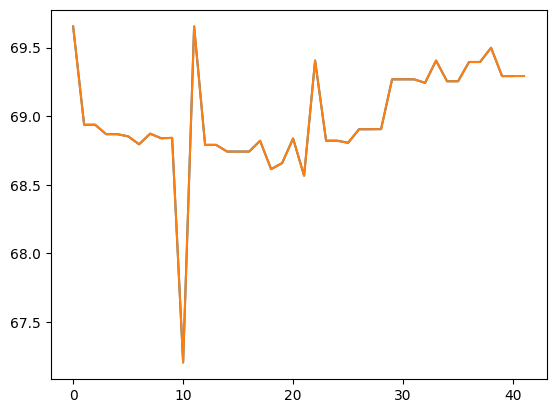

In [145]:
plt.figure()
plt.plot(dataframe["Avg HR"])
plt.plot(dataframe1["Avg HR"])

In [147]:
list(dataframe["Avg HR"])

[69.65321191695115,
 68.93718780190154,
 68.93718780190154,
 68.86856040680338,
 68.8685604068034,
 68.8529206805916,
 68.7947890077479,
 68.87204001507236,
 68.83889365555113,
 68.84149799380157,
 67.20515377124904,
 69.65321191695115,
 68.79053292417828,
 68.79053292417828,
 68.74188444862877,
 68.74188444862877,
 68.74188444862877,
 68.82031111282255,
 68.61389551532767,
 68.65737757577136,
 68.83701742323615,
 68.56612620665855,
 69.4048511851258,
 68.82101159714178,
 68.8210115971418,
 68.80575022807508,
 68.9045386098095,
 68.9045386098095,
 68.90551054874861,
 69.26818094508779,
 69.2681809450878,
 69.2681809450878,
 69.24252028885955,
 69.4048511851258,
 69.25405391865819,
 69.25405391865819,
 69.39447447323816,
 69.39447447323818,
 69.49805405284522,
 69.29182339180443,
 69.29182339180443]

In [150]:
list(dataframe1["Avg HR"]) == 

[69.65321191695115,
 68.93718780190154,
 68.93718780190154,
 68.86856040680338,
 68.8685604068034,
 68.8529206805916,
 68.7947890077479,
 68.87204001507236,
 68.83889365555113,
 68.84149799380157,
 67.20515377124904,
 69.65321191695115,
 68.79053292417828,
 68.79053292417828,
 68.74188444862877,
 68.74188444862877,
 68.74188444862877,
 68.82031111282255,
 68.61389551532767,
 68.65737757577136,
 68.83701742323615,
 68.56612620665855,
 69.4048511851258,
 68.82101159714178,
 68.8210115971418,
 68.80575022807508,
 68.9045386098095,
 68.9045386098095,
 68.90551054874861,
 69.26818094508779,
 69.2681809450878,
 69.2681809450878,
 69.24252028885955,
 69.4048511851258,
 69.25405391865819,
 69.25405391865819,
 69.39447447323816,
 69.39447447323818,
 69.49805405284522,
 69.29182339180443,
 69.29182339180443,
 69.29182339180443]

## Plot Signals

In [31]:
import matplotlib.pyplot as plt

In [48]:
for epoch in signals:
    print(np.array(epoch["nSeq"])[-1]-np.array(epoch["nSeq"])[0],
          np.array(epoch["Timestamps"])[-1]-np.array(epoch["Timestamps"])[0])

3999.0 39.90320046074339
3999.0 39.988254556345055
3999.0 39.984522523969645
3999.0 39.985912398726214
3999.0 39.98531266822829
3999.0 39.98653200594708
3999.0 39.98558922304073
3999.0 39.98523327114526
3999.0 39.98523327114526
3999.0 39.986465999885695
3999.0 39.988993757608114
3999.0 40.01601941219997
3999.0 39.98834855272435
3999.0 39.9886273497832
3999.0 39.9884773681988
3999.0 39.98937326078885
3999.0 39.98692475006101
3999.0 39.987844666989986
3999.0 39.98716108329245
3999.0 39.98775579762878
3999.0 39.98839139792835
3999.0 39.98839139792835
3999.0 39.9961342010065
3999.0 39.98667804762954
3999.0 39.98841346529662
3999.0 39.98966309305979
3999.0 39.9907322973595
3999.0 39.99001735652564
3999.0 39.990080479503376
3999.0 39.9897926923004
3999.0 39.99051744493772
3999.0 39.99034175518318
3999.0 39.99051835699356
3999.0 39.9961342010065
3999.0 39.98977158477646
3999.0 39.98913398390869
3999.0 39.988622904755175
3999.0 39.98939961552969
3999.0 39.98997773230076
3999.0 39.9897832352435

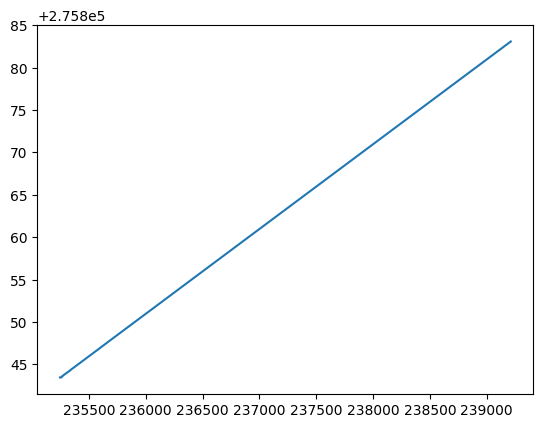

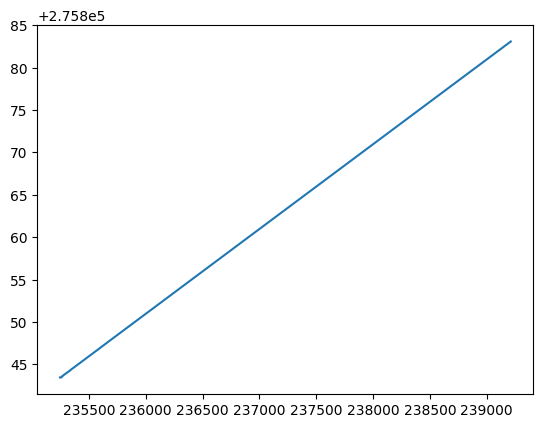

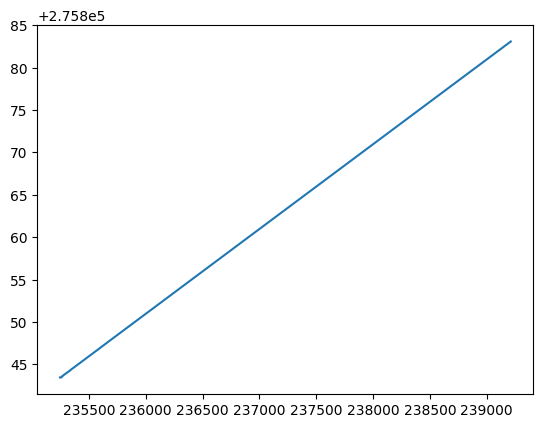

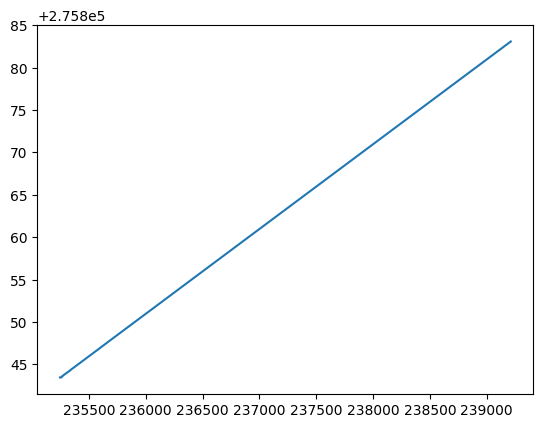

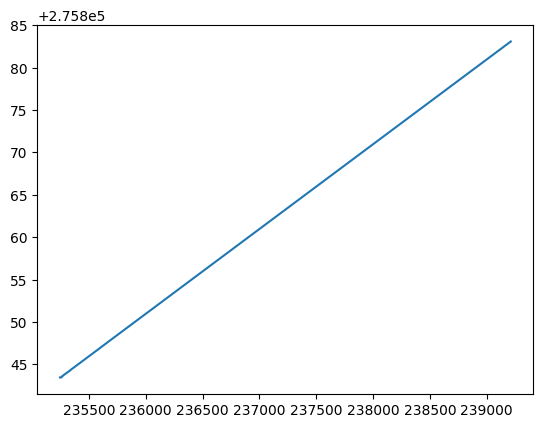

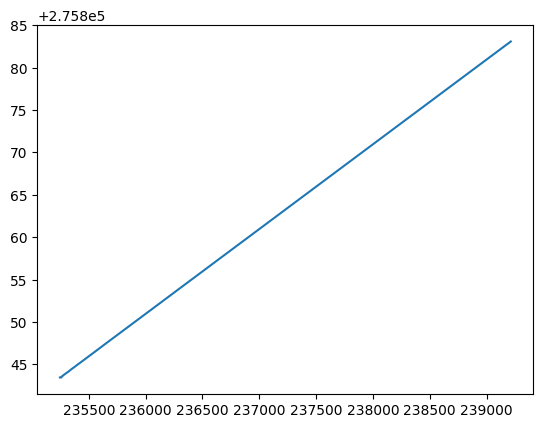

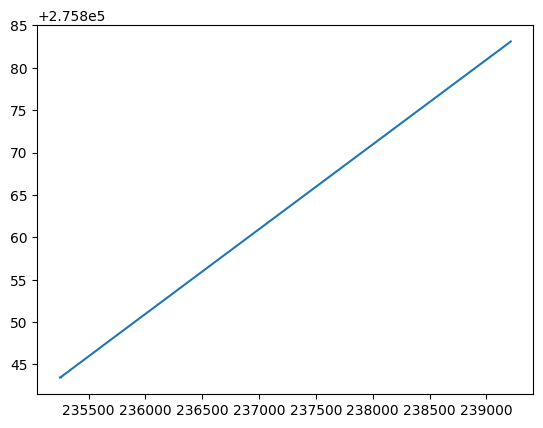

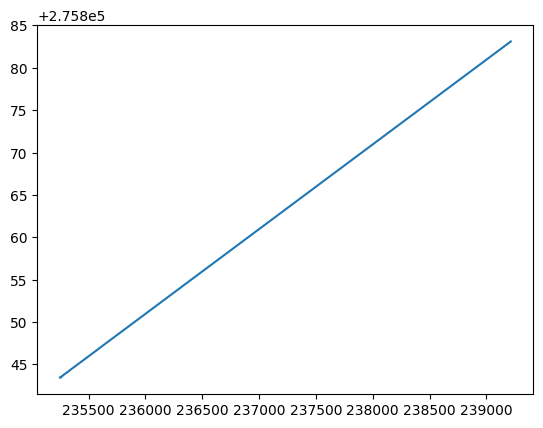

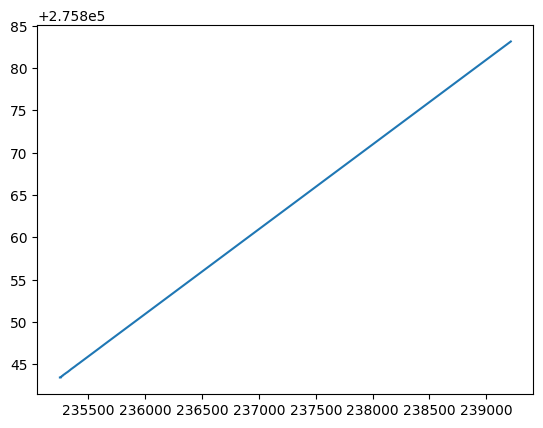

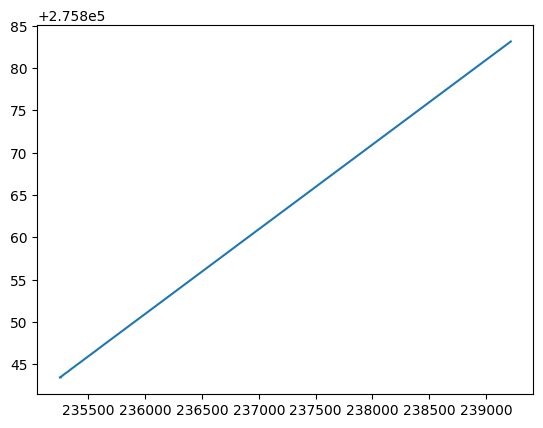

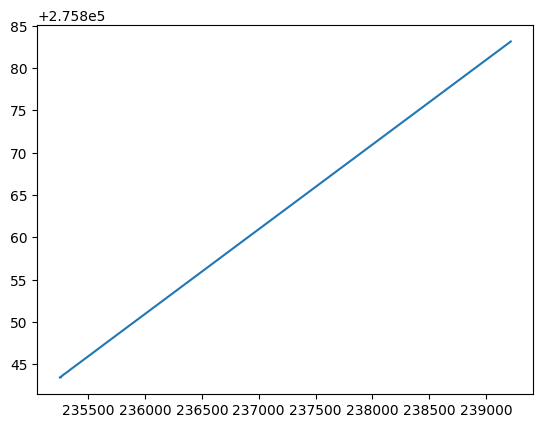

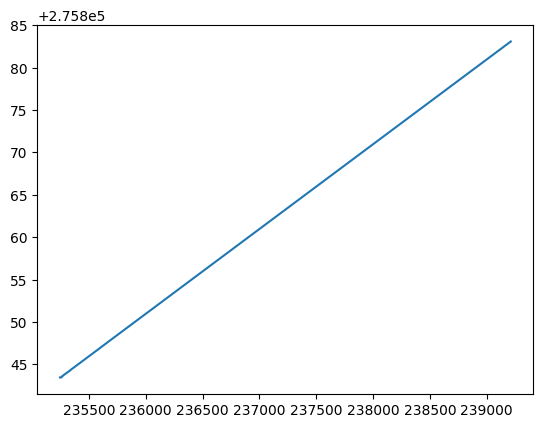

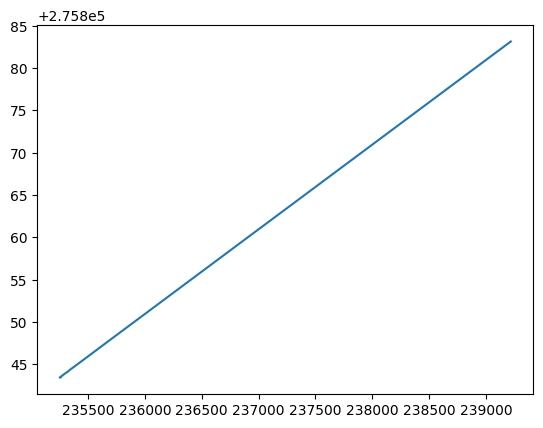

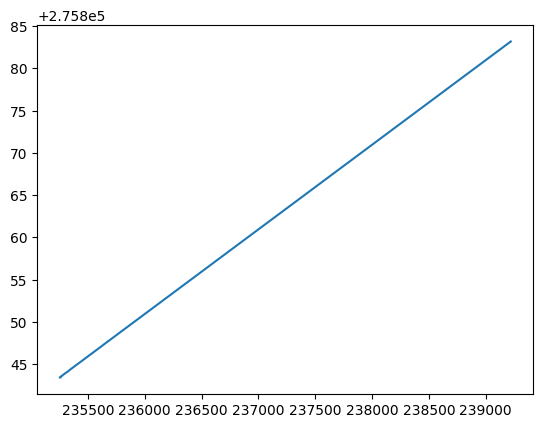

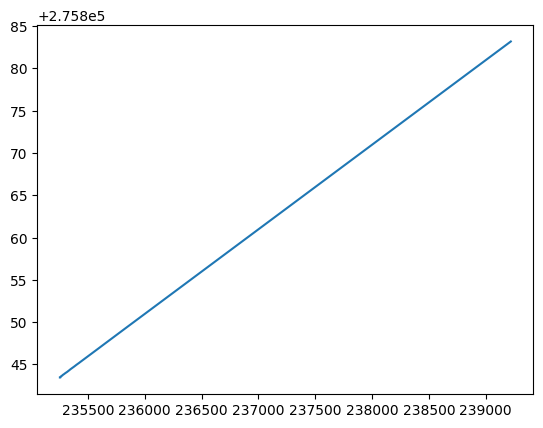

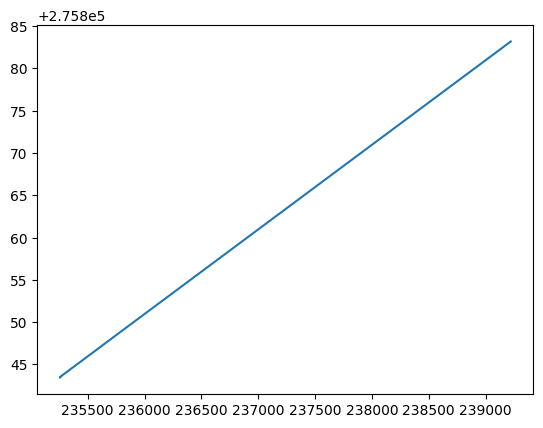

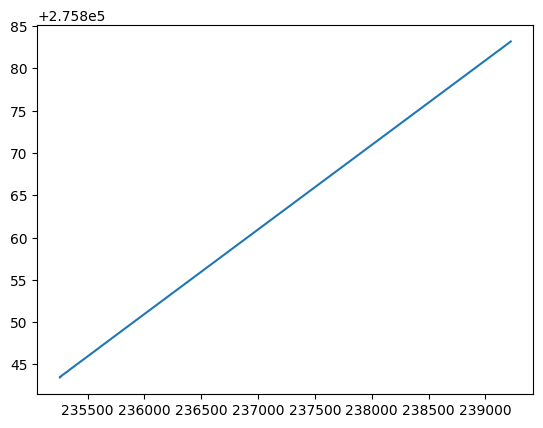

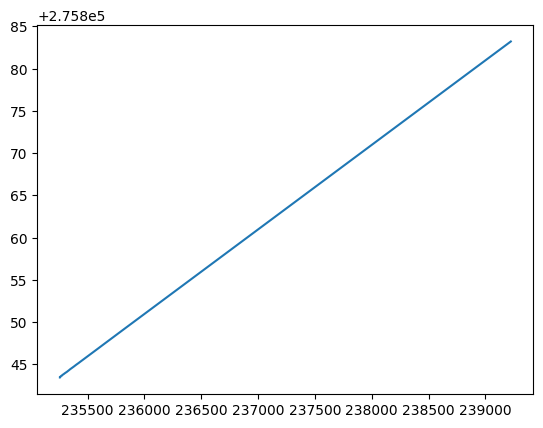

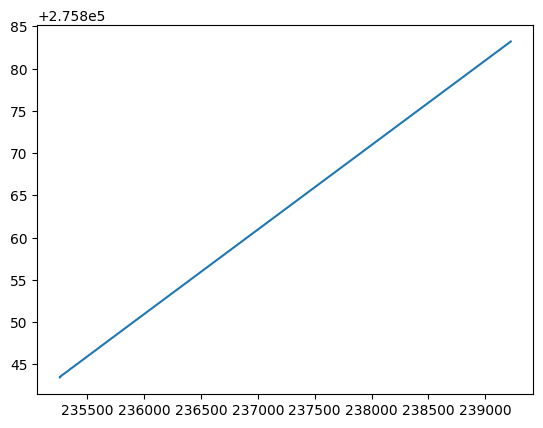

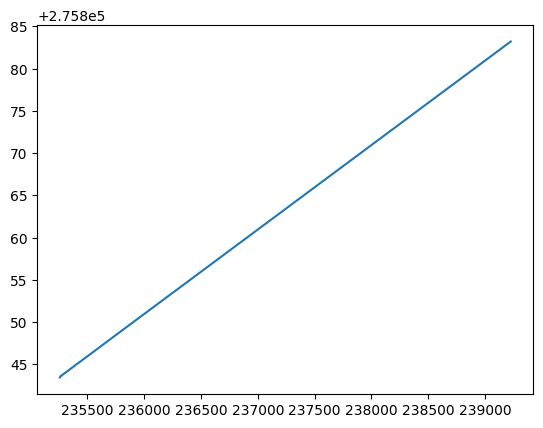

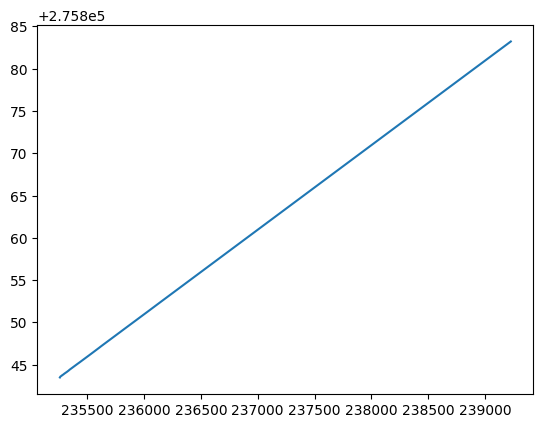

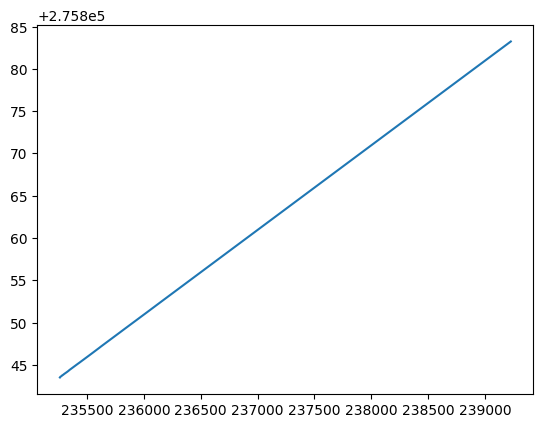

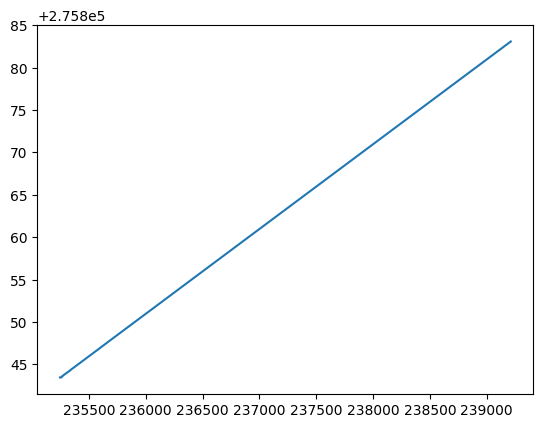

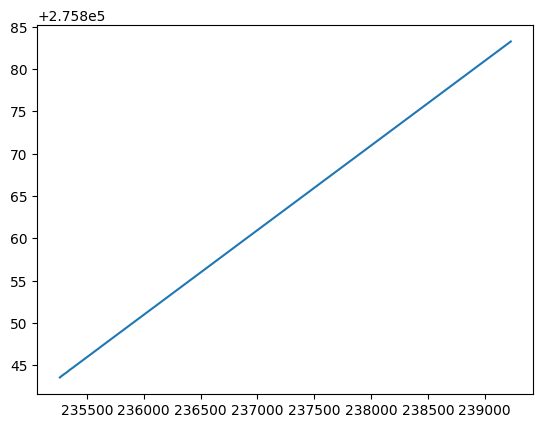

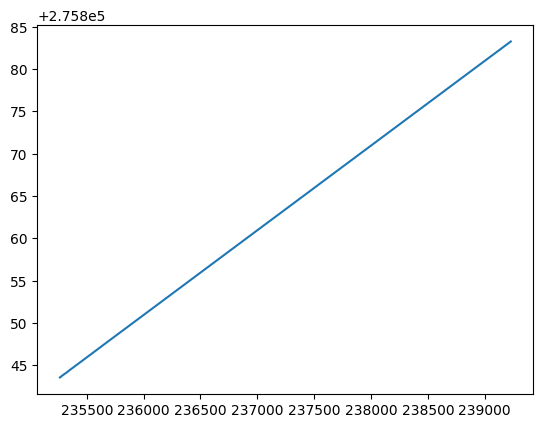

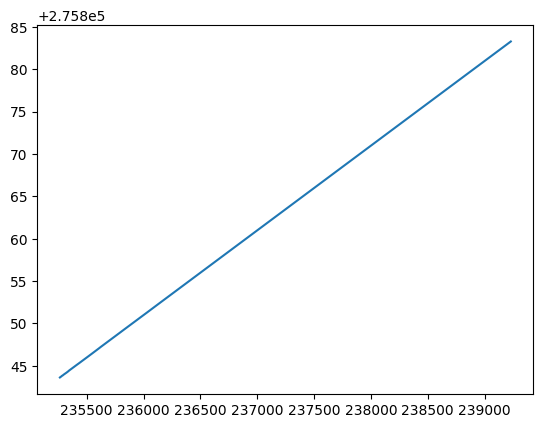

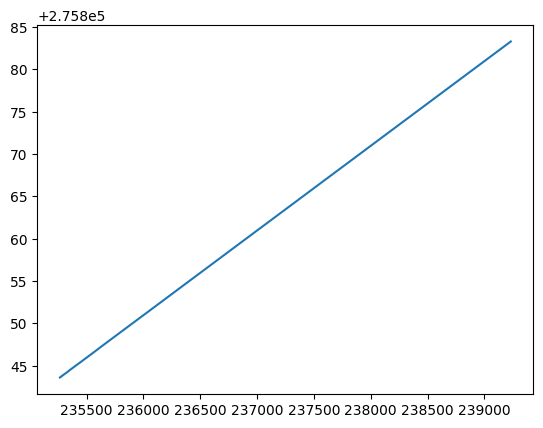

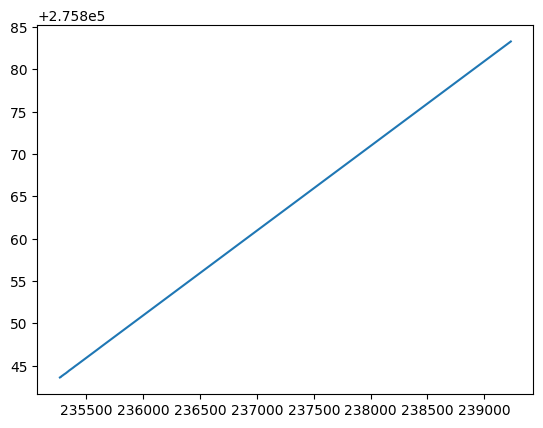

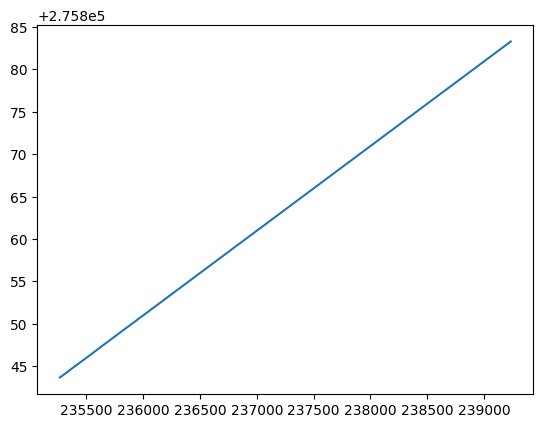

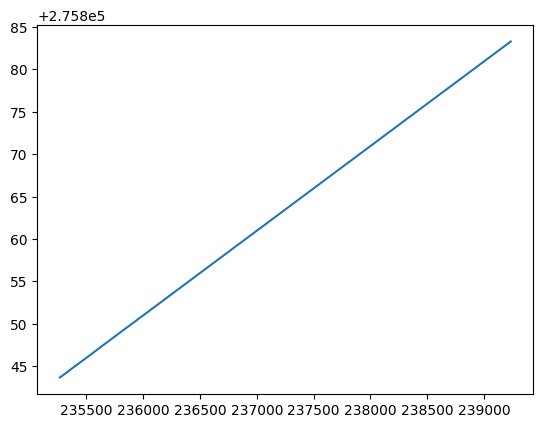

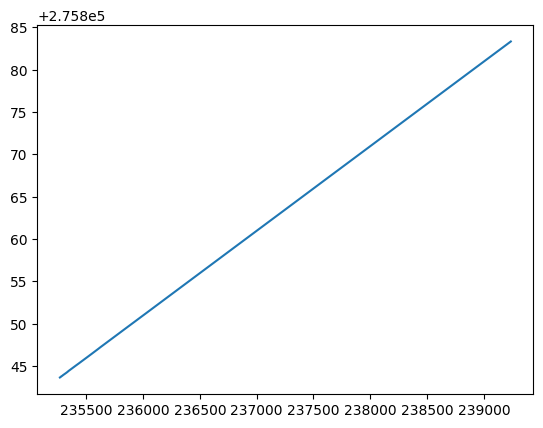

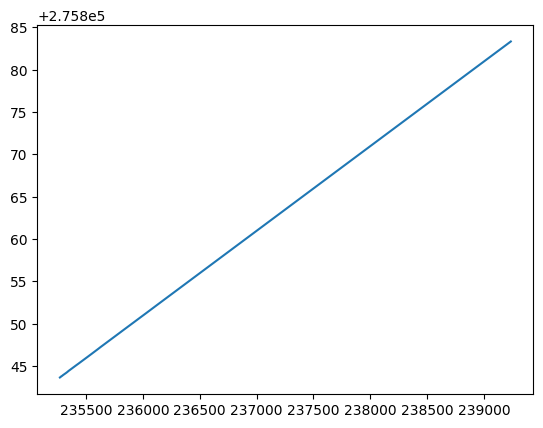

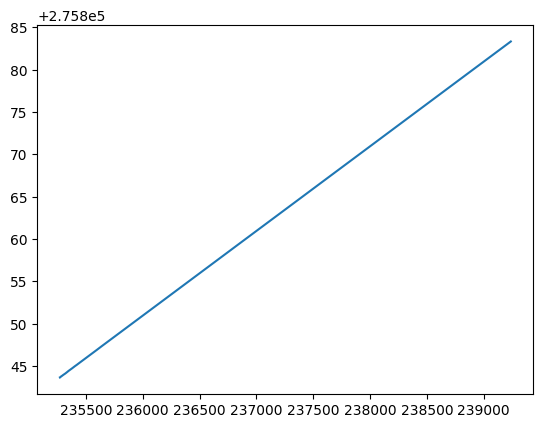

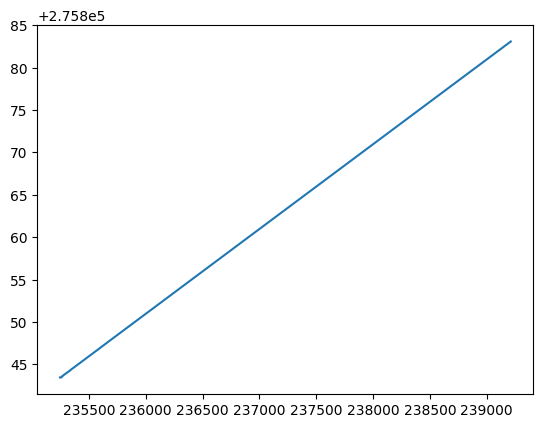

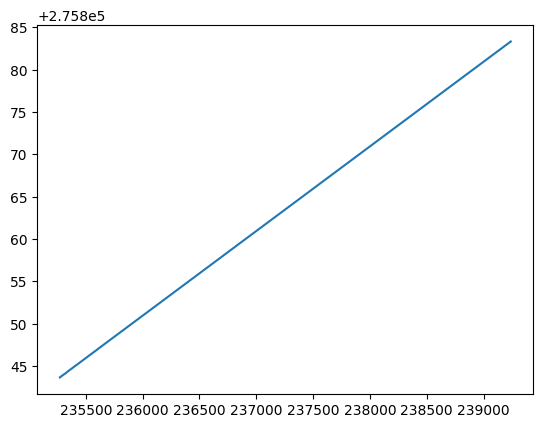

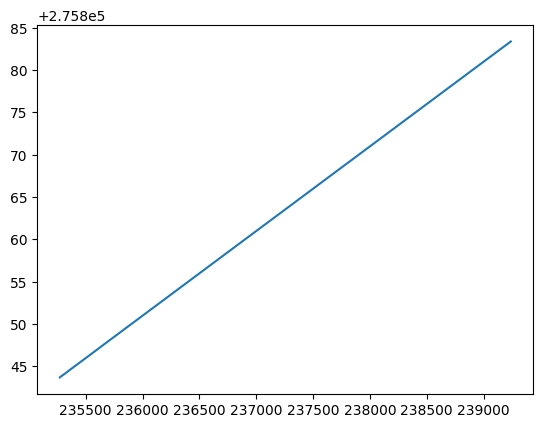

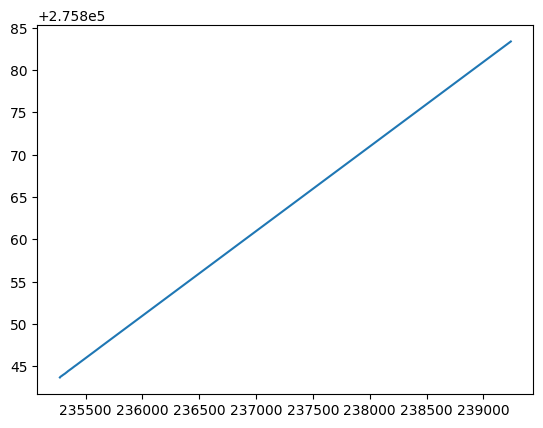

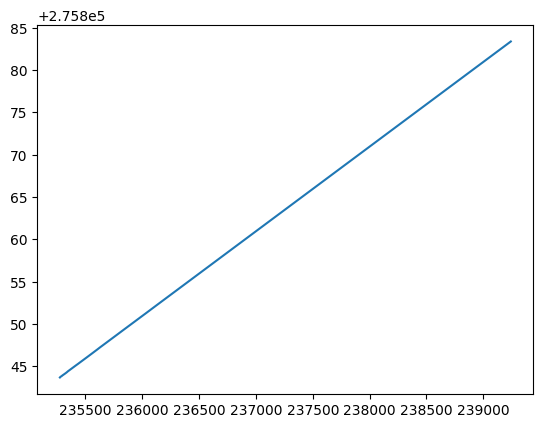

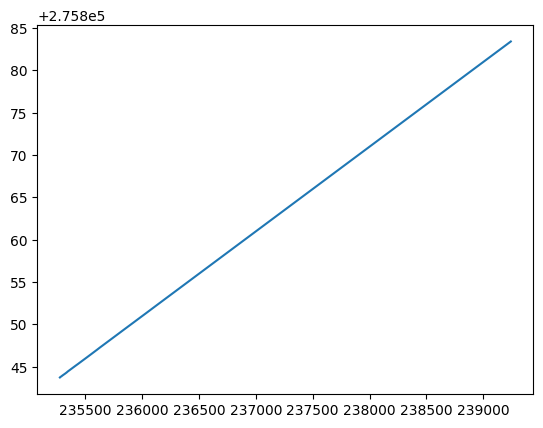

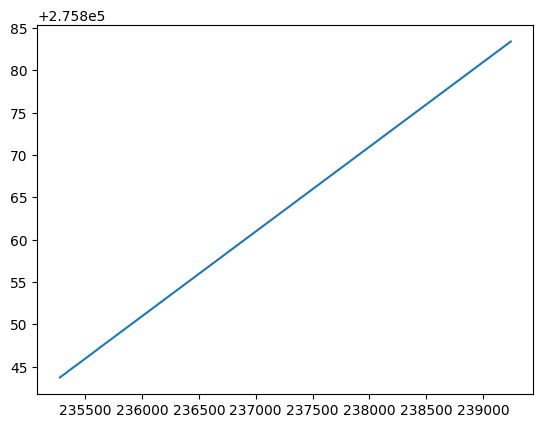

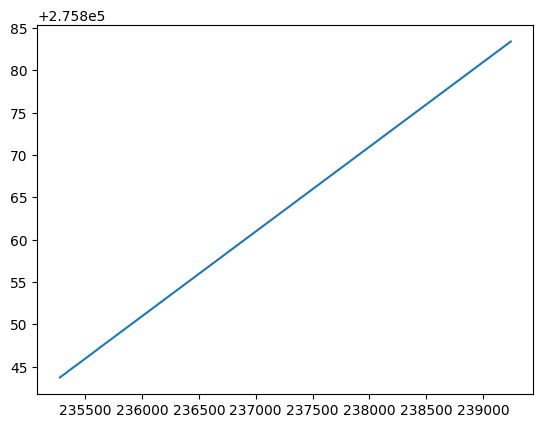

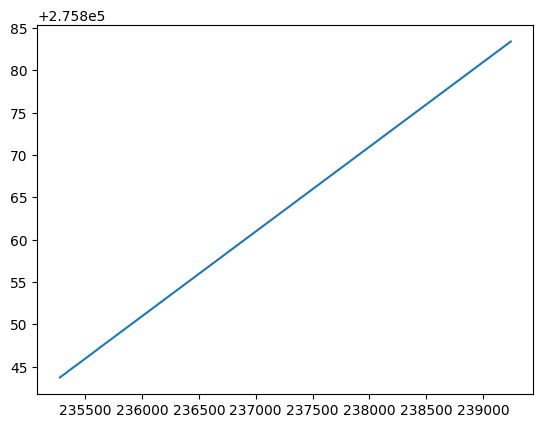

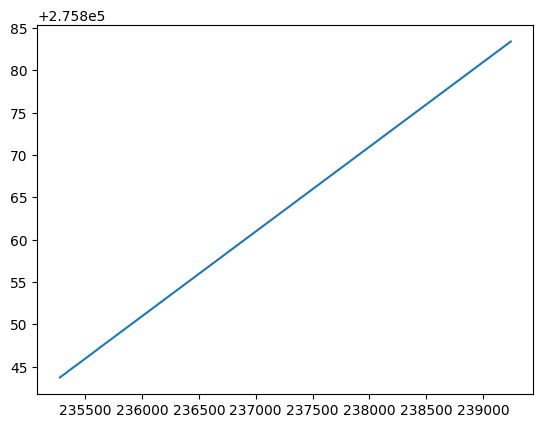

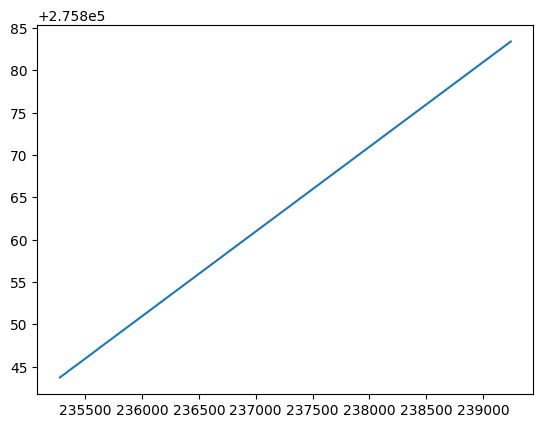

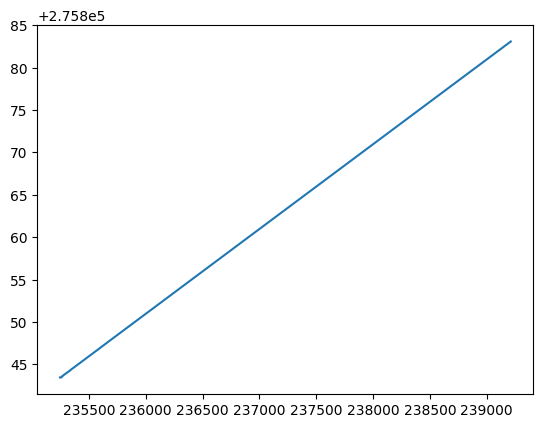

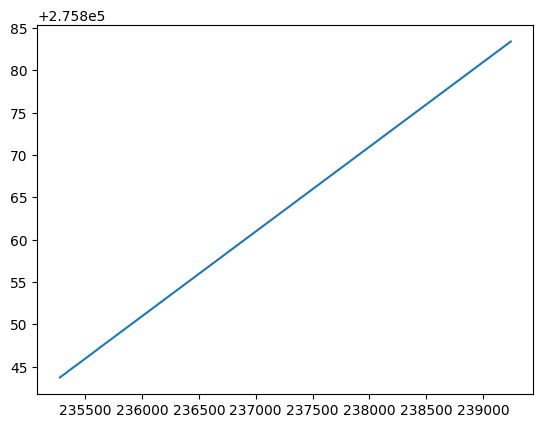

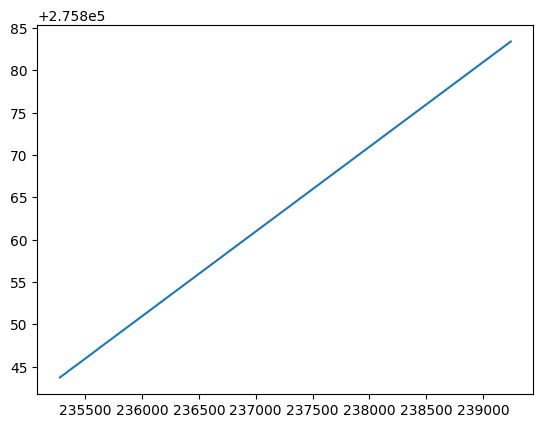

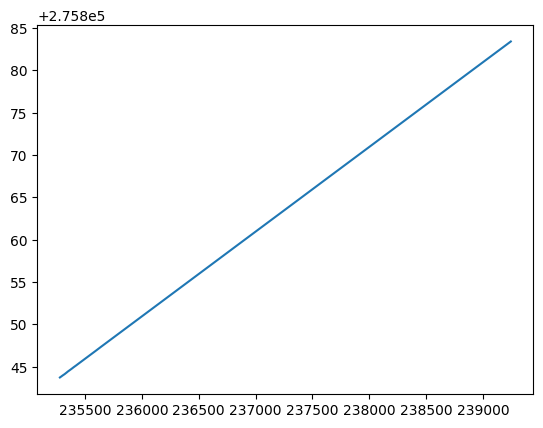

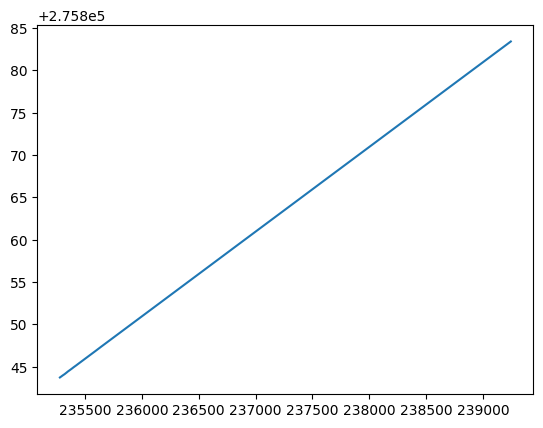

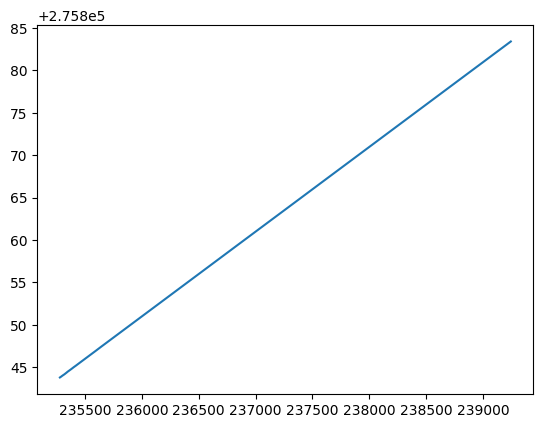

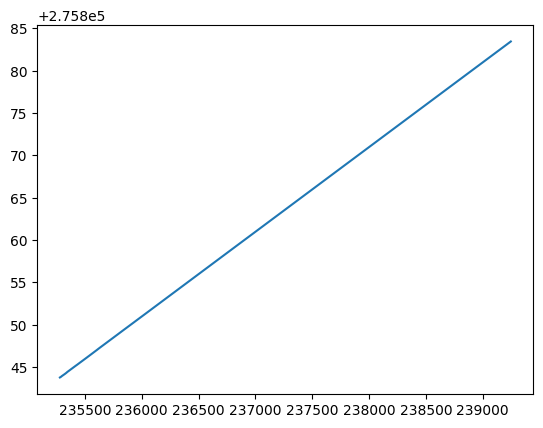

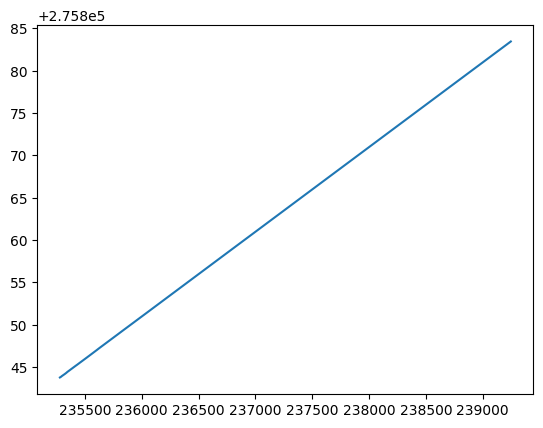

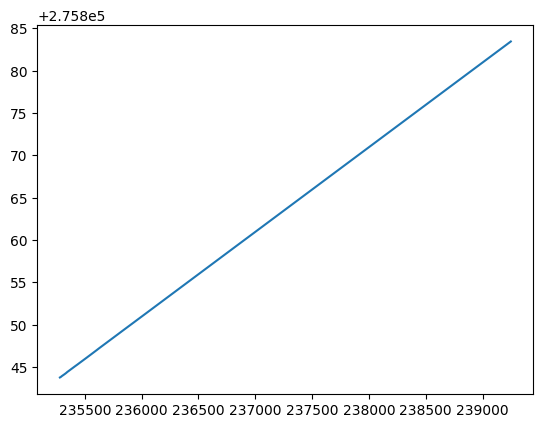

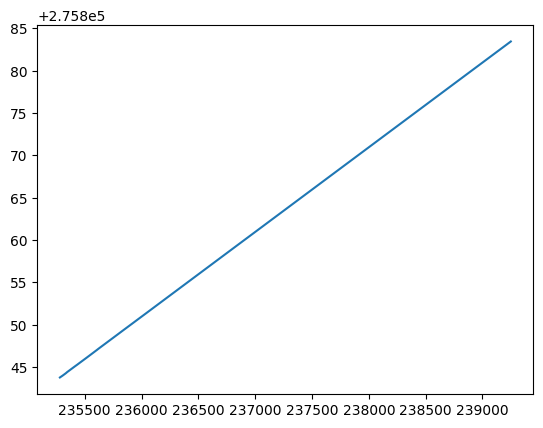

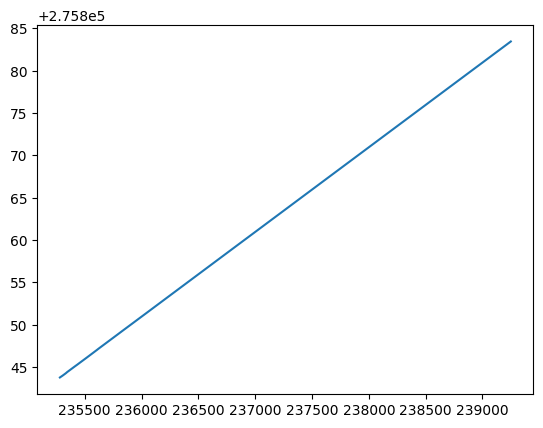

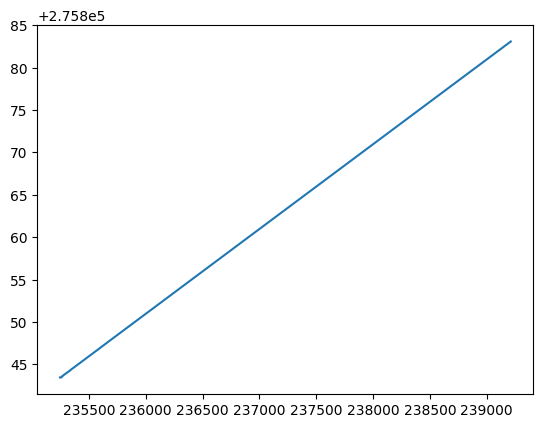

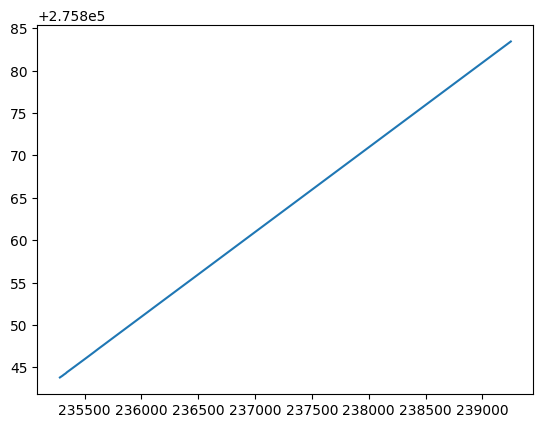

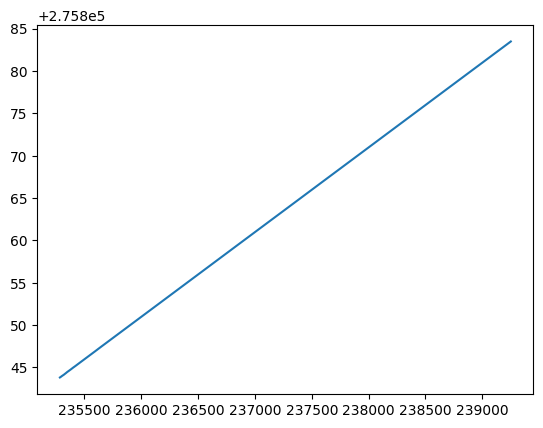

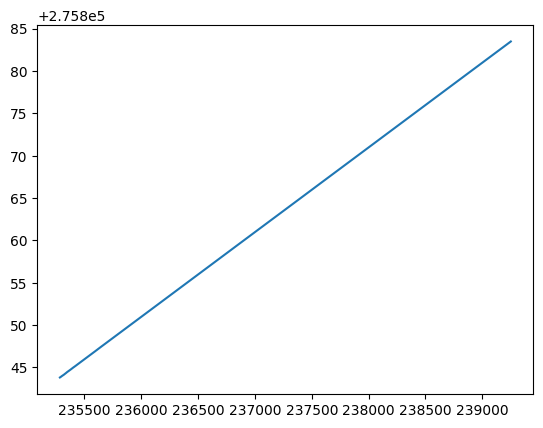

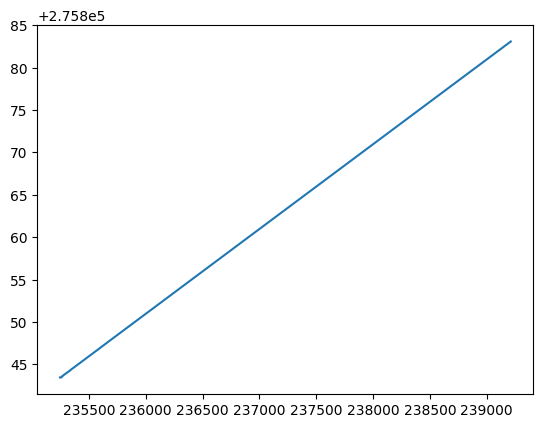

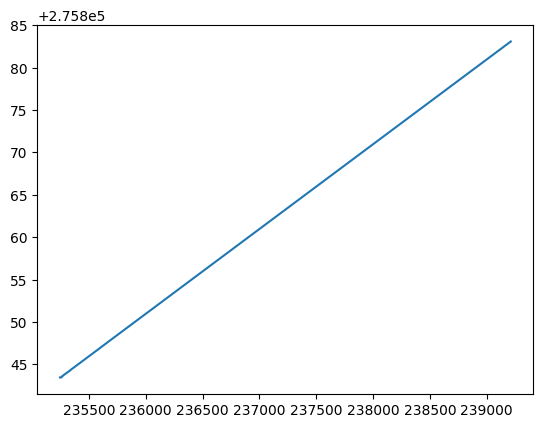

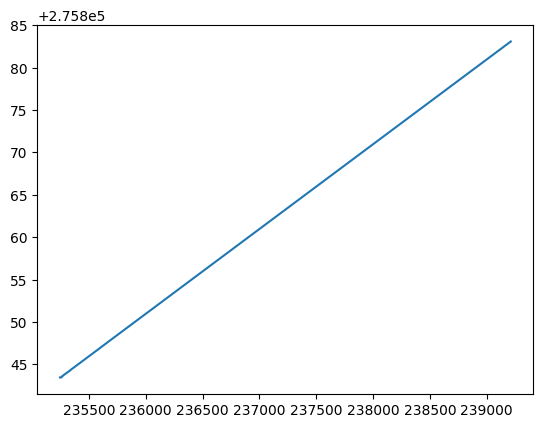

In [32]:
for epoch in signals:
    plt.figure()
    plt.plot(epoch["nSeq"],epoch["Timestamps"])

C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_15180\133735459.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


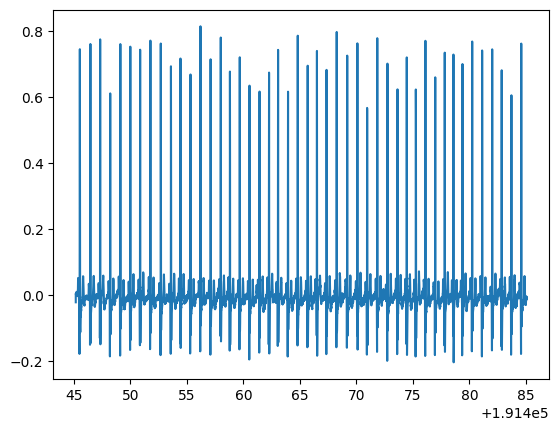

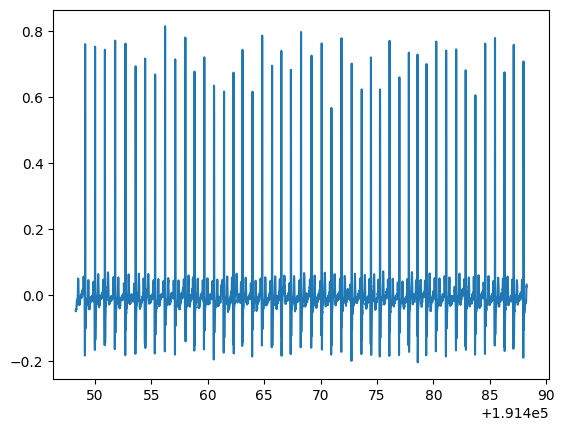

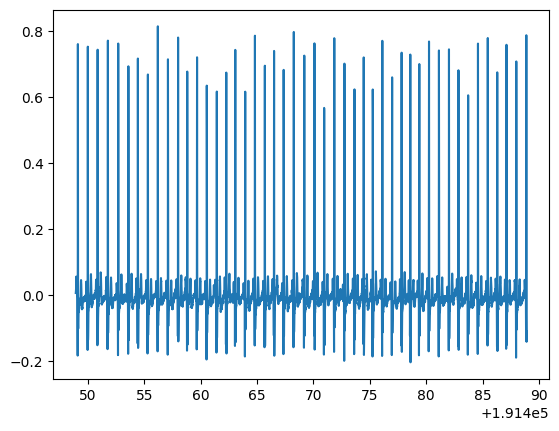

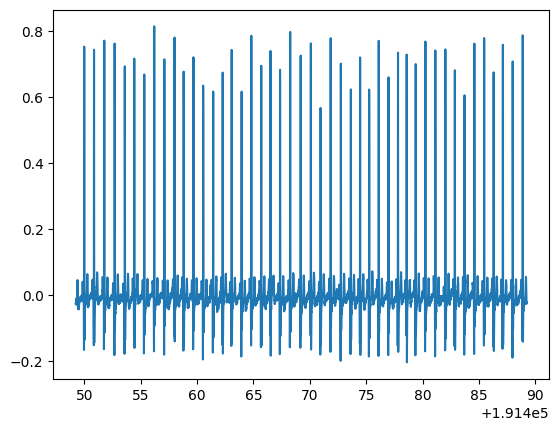

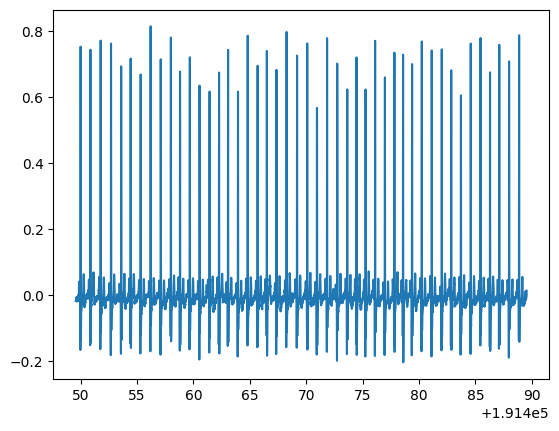

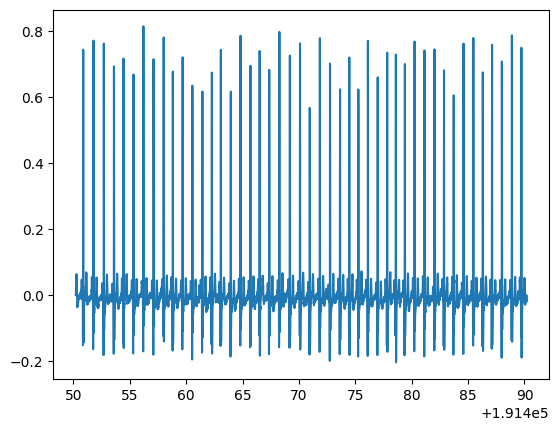

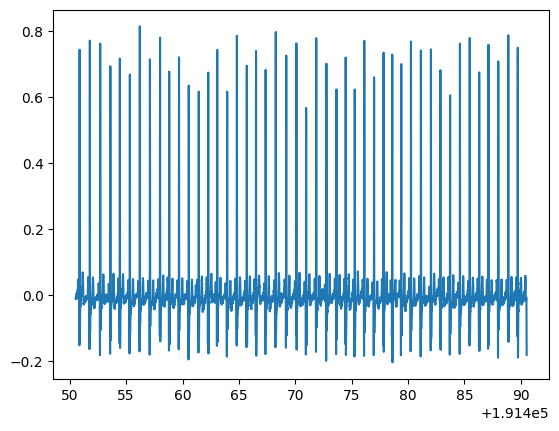

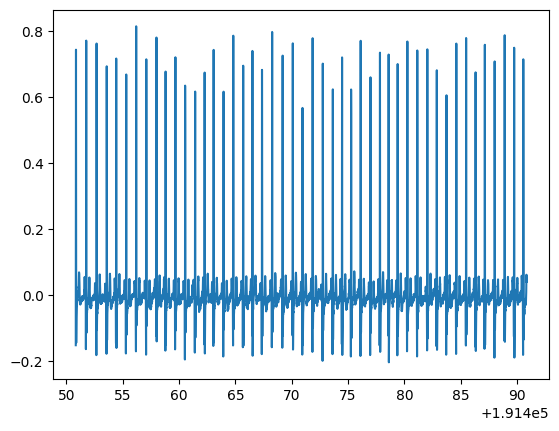

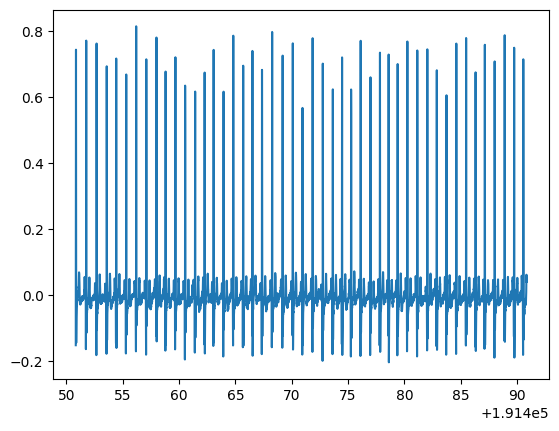

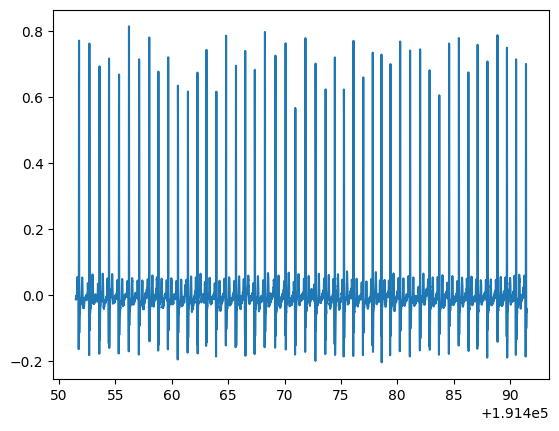

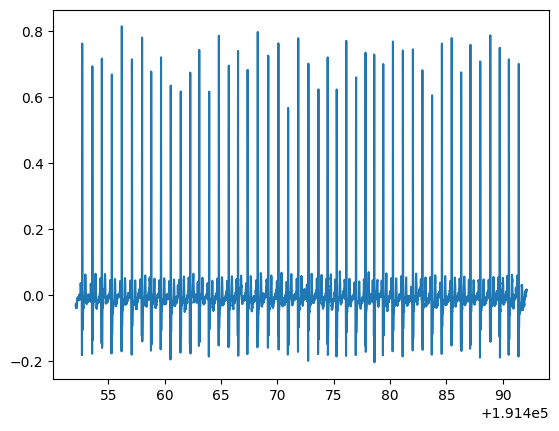

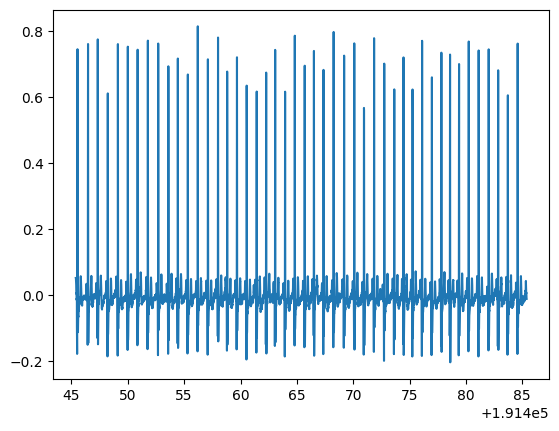

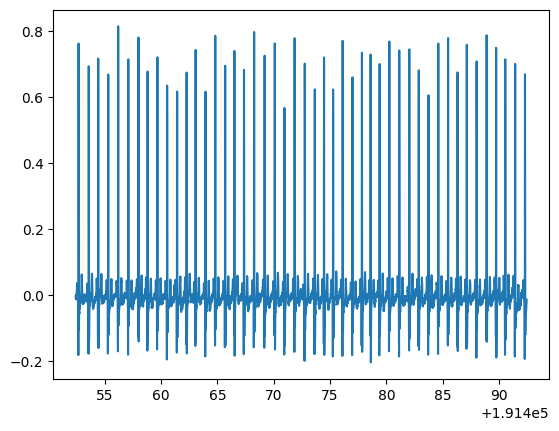

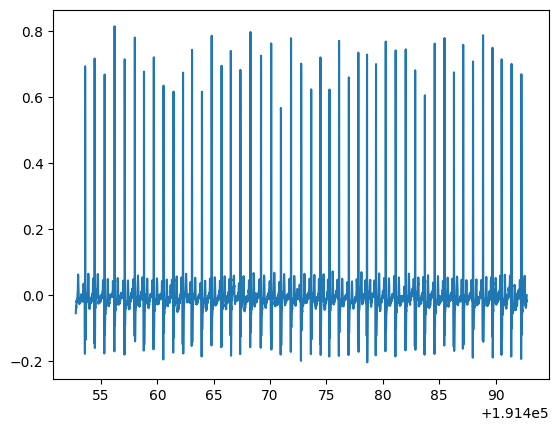

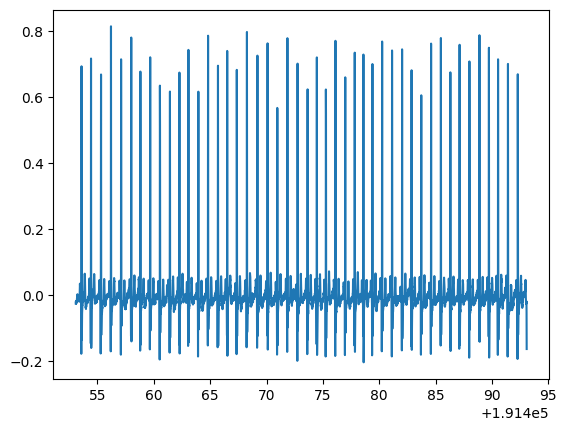

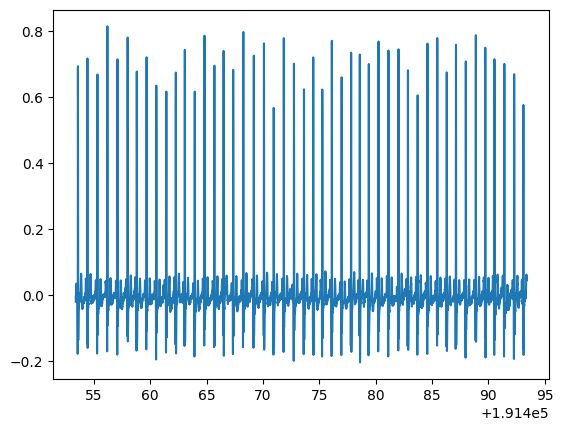

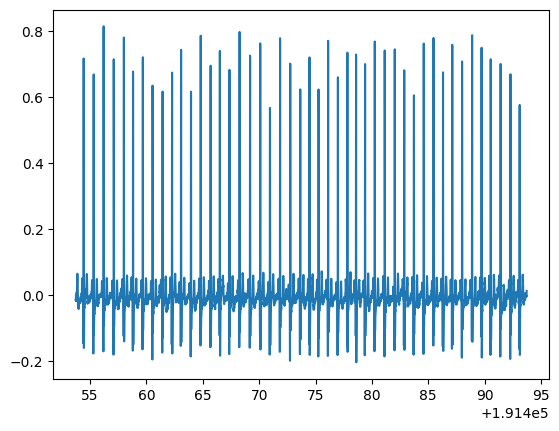

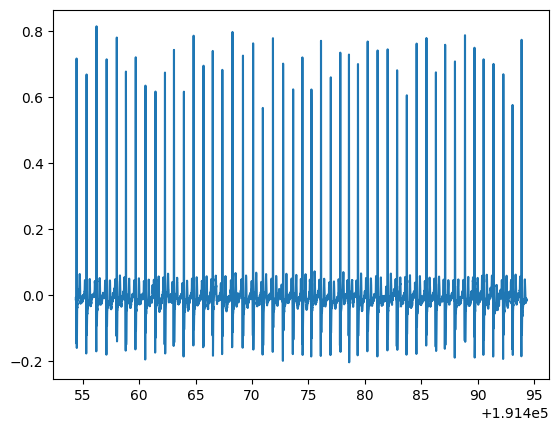

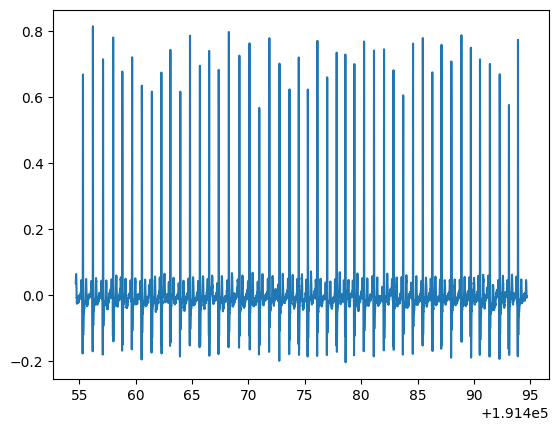

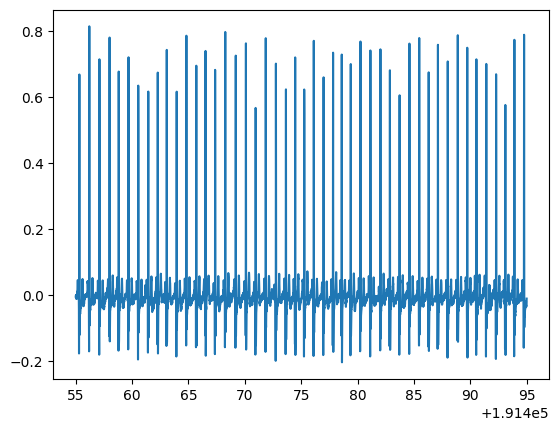

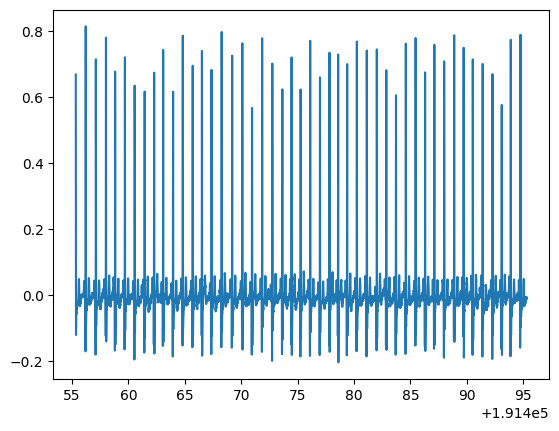

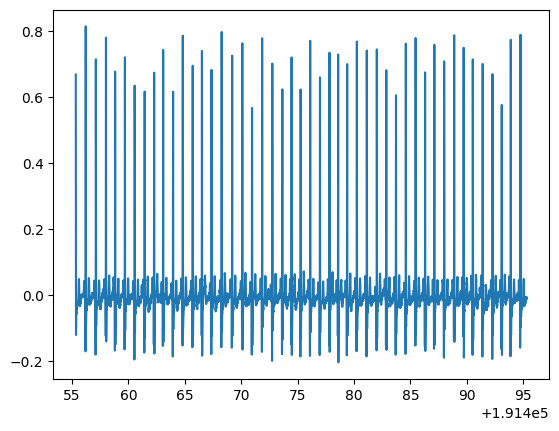

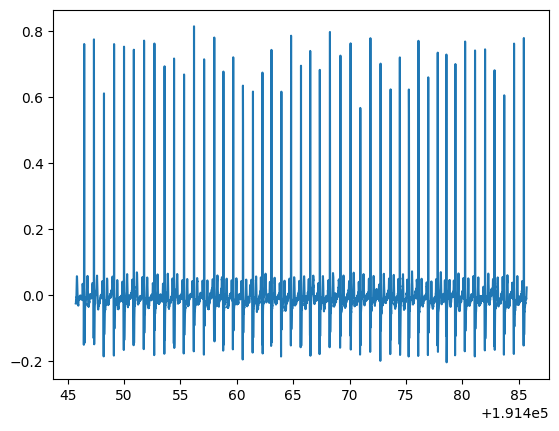

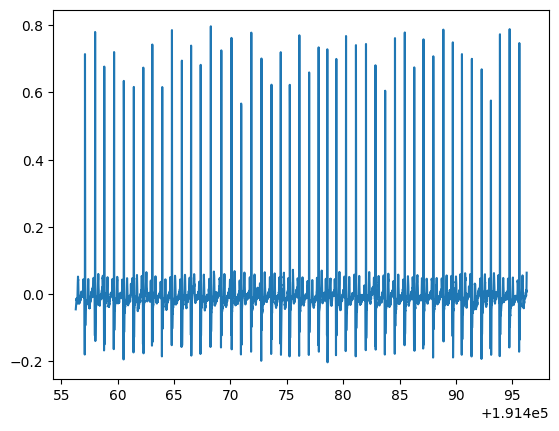

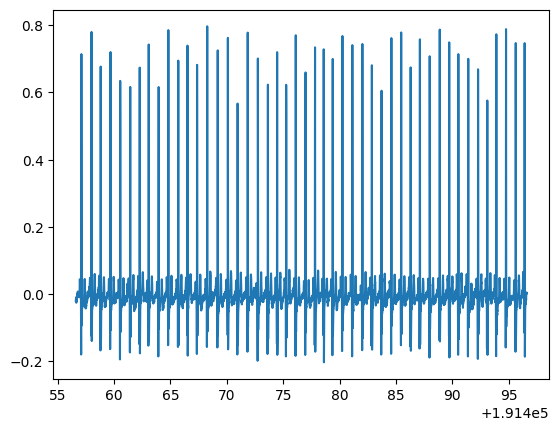

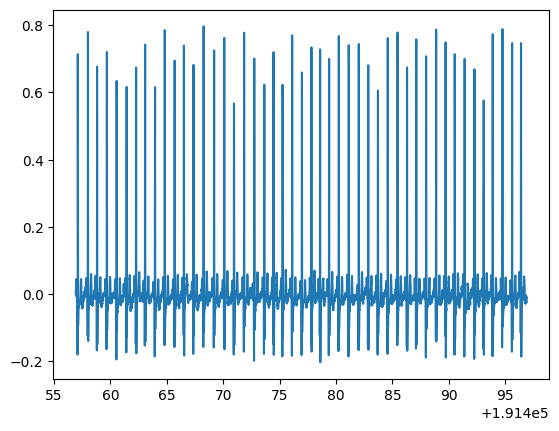

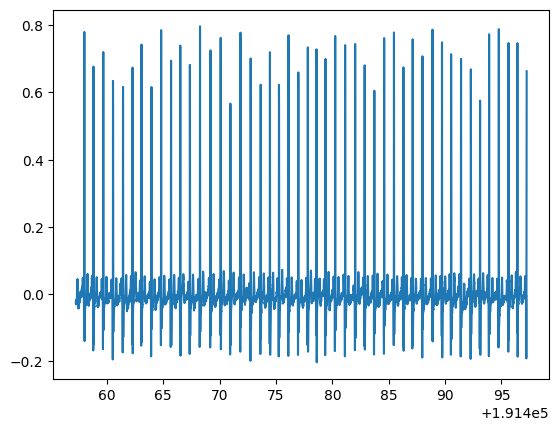

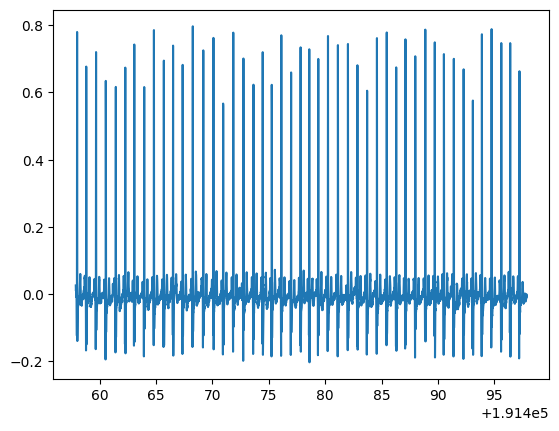

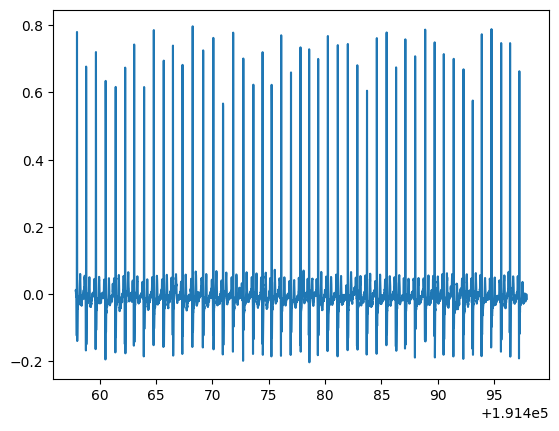

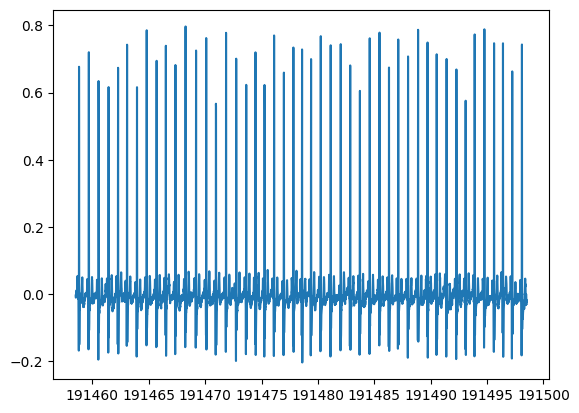

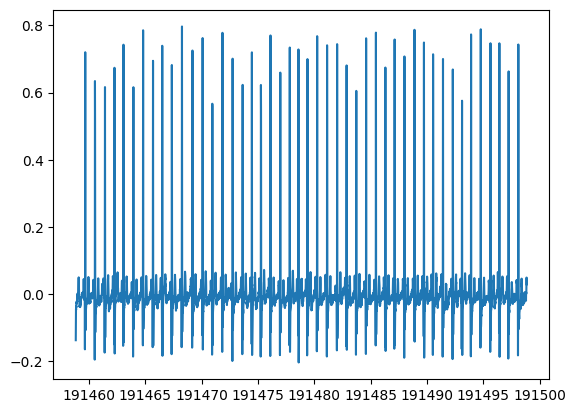

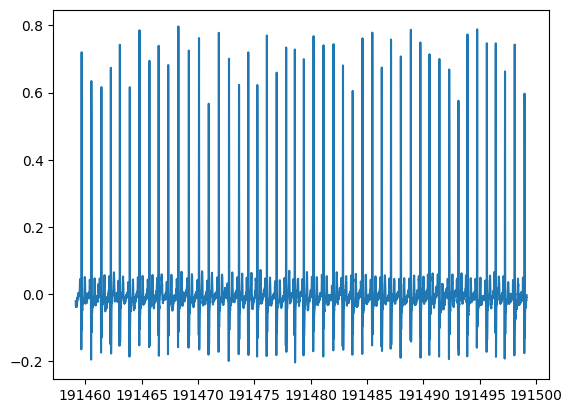

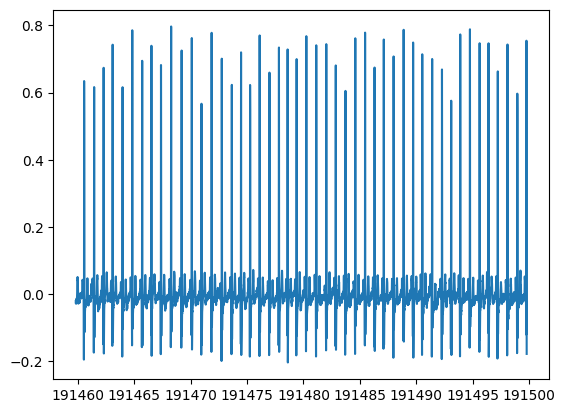

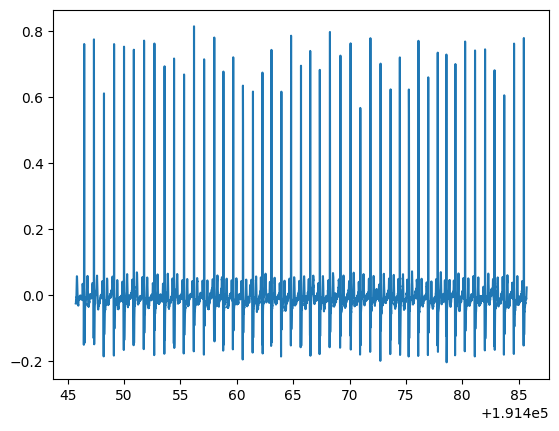

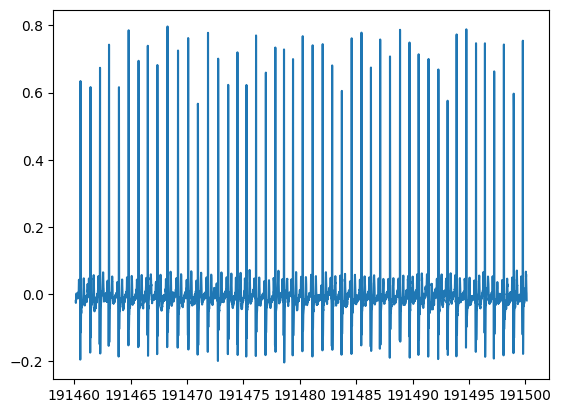

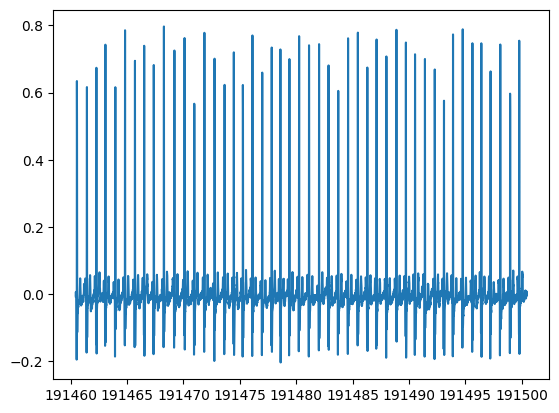

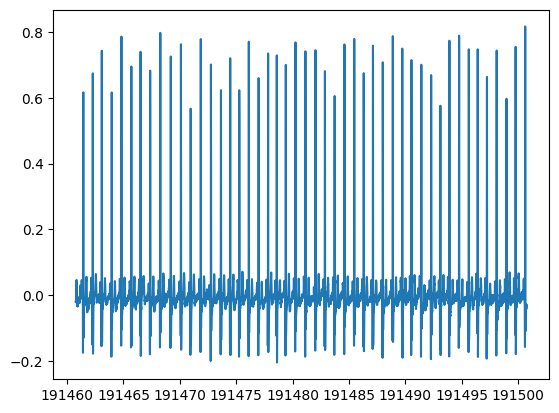

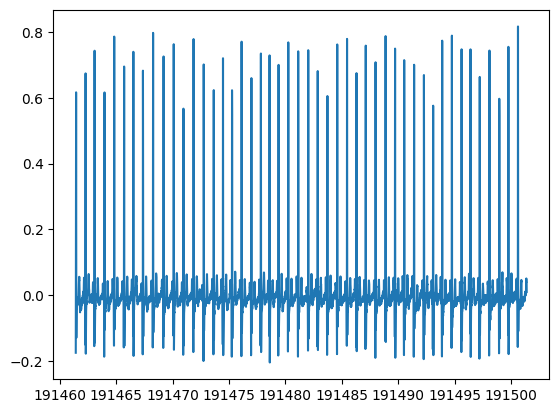

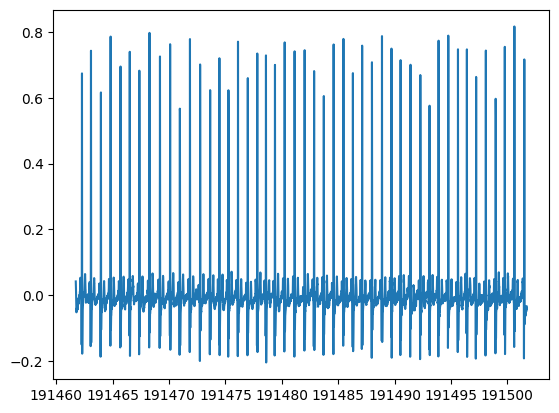

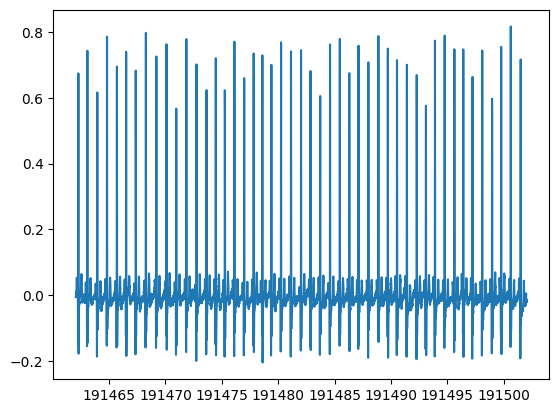

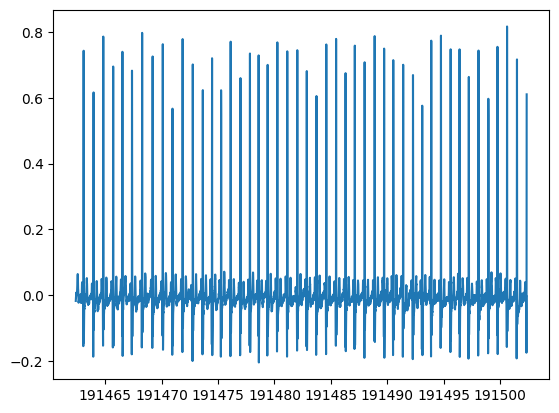

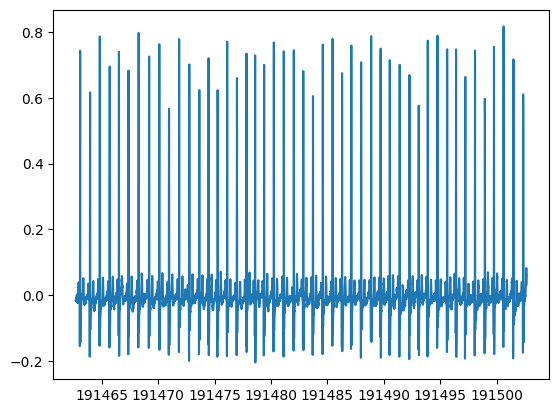

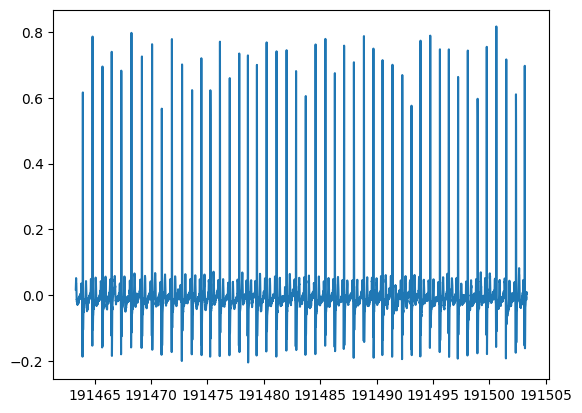

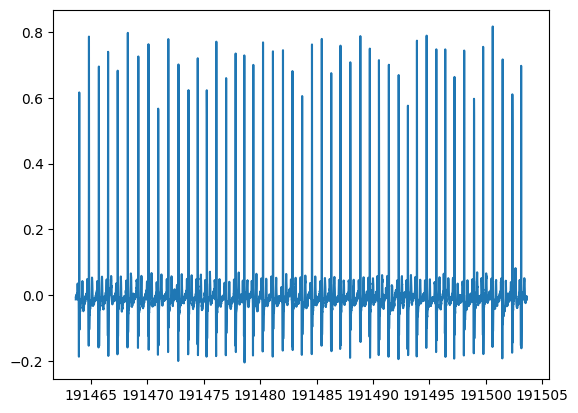

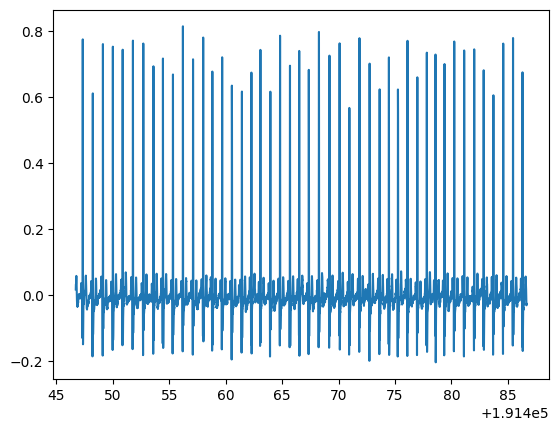

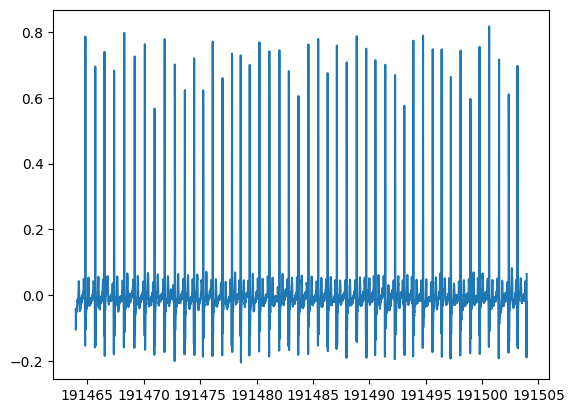

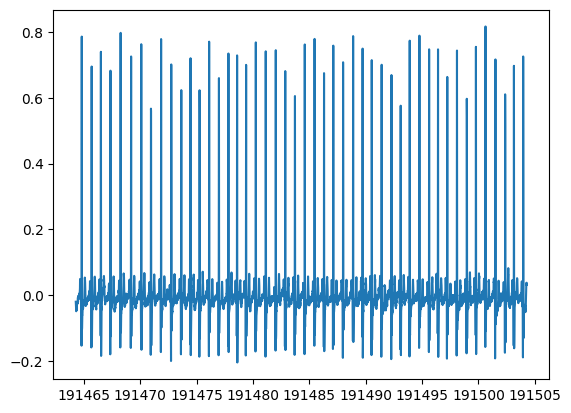

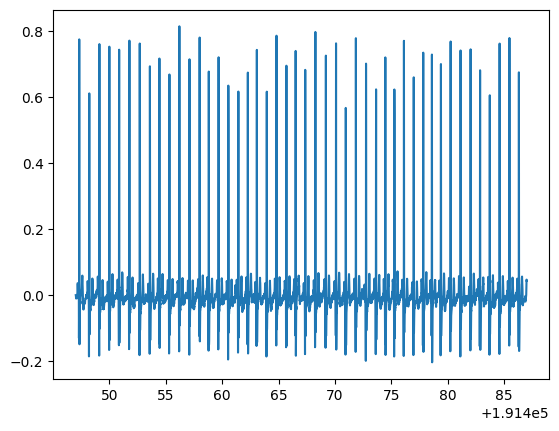

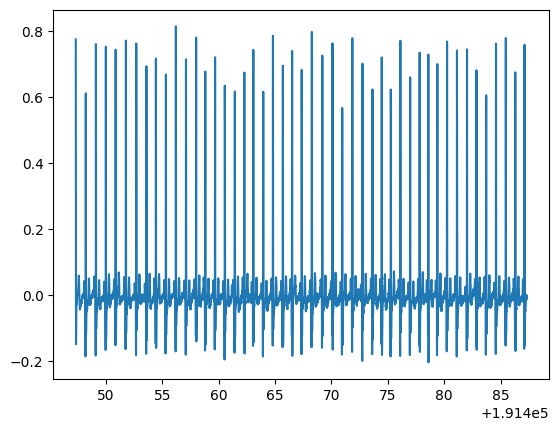

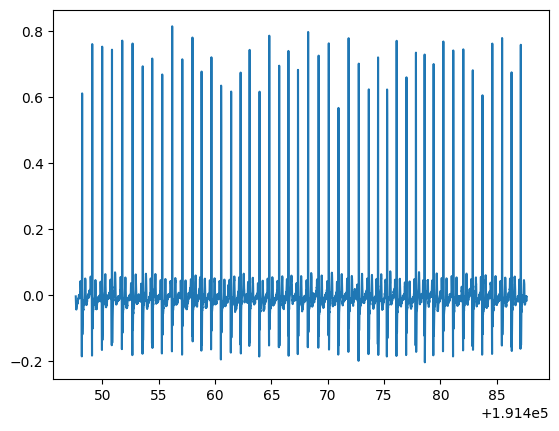

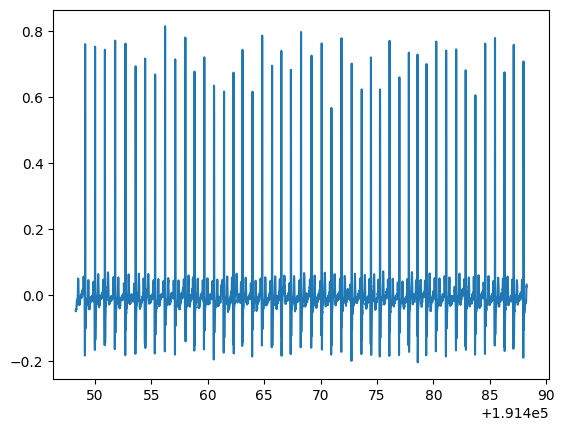

In [49]:
for epoch in signals:
    plt.figure()
    plt.plot(epoch["Timestamps"],epoch["ECG0"])
#     plt.plot(epoch["Timestamps"],epoch["EDA1"])
#     plt.plot(epoch["Timestamps"],epoch["RESPIRATION2"])